In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('test.csv',encoding="SHIFT-JIS")

In [34]:
len(df[(df['牽制先の塁']!=0) & (df['Oカウント']==1)])
len(df[(df['牽制先の塁']!=0)])

5391

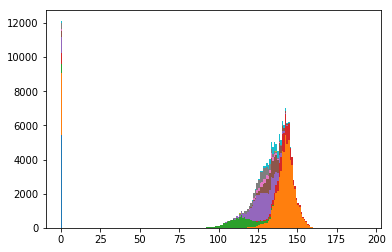

In [4]:
split_data = []
for ball in range(10):
    split_data.append(df[df.球種ID==ball])
temp = [i["球速"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=193);

In [5]:
score = df[(df.試合ID==1000)&(df.イニング==1)&(df.表裏F==0)]
max(score.ビジターチーム点数計)-min(score.ビジターチーム点数計)

0

In [6]:
kensei =  df[(df.試合ID==1000)&(df.イニング==1)&(df.表裏F==1)&(df.牽制先の塁!=0)]

In [30]:
game_list = np.arange(1000,1482,1)
inning_list = np.arange(1,12,1)
side_list = [0,1]
kensei = []
score = []
for i in game_list :
    for j in inning_list:
        for k in side_list:
            data = df[(df.試合ID==i)&(df.イニング==j)&(df.表裏F==k)&(df.牽制先の塁!=0)]
            if len(data)!=0:
                kensei.append(len(data))
                data = df[(df.試合ID==i)&(df.イニング==j)&(df.点数!=0)]
                score.append(sum(data.点数.values))

[[0.04127637]]
0.001067858974532987


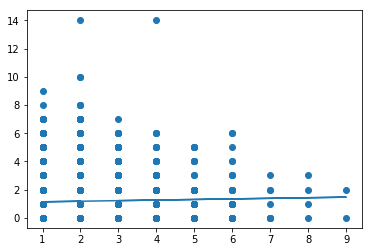

In [31]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
kensei = np.array(kensei).reshape(-1,1)
score = np.array(score).reshape(-1,1)
clf.fit(kensei, score)
print(clf.coef_)
p = clf.predict(kensei)

plt.scatter(kensei, score)
plt.plot(kensei,p)

print(clf.score(kensei, score))

In [9]:
score_max = max(score)
kensei_max = max(kensei)
kensei_matrix = np.zeros([score_max+1,kensei_max+1],dtype = 'int32')
for i,j in zip(kensei,score):
    kensei_matrix[j,i] +=1

kensei_matrix_norm = np.zeros([len(kensei_matrix),len(kensei_matrix.T)])
for i in range(len(kensei_matrix.T)):
    kensei_matrix_norm[:,i] = kensei_matrix[:,i]/np.sum(kensei_matrix[:,i])
df_kensei_norm = pd.DataFrame(kensei_matrix_norm)
df_kensei_norm

,0,1,2,3,4,5,6,7,8,9
0,0.708006,0.4848,0.441370,0.447236,0.477528,0.467532,0.382353,0.500,0.25,0.5
1,0.147960,0.2216,0.234519,0.203518,0.264045,0.220779,0.235294,0.125,0.25,0.0
2,0.077781,0.1424,0.160738,0.163317,0.101124,0.181818,0.147059,0.250,0.25,0.5
3,0.032810,0.0808,0.073781,0.080402,0.084270,0.025974,0.088235,0.125,0.25,0.0
4,0.017608,0.0376,0.039526,0.047739,0.028090,0.051948,0.058824,0.000,0.00,0.0
5,0.009628,0.0192,0.018445,0.042714,0.022472,0.051948,0.029412,0.000,0.00,0.0
6,0.003420,0.0072,0.013175,0.012563,0.016854,0.000000,0.058824,0.000,0.00,0.0
7,0.001393,0.0048,0.010540,0.002513,0.000000,0.000000,0.000000,0.000,0.00,0.0
8,0.000760,0.0008,0.003953,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.0
9,0.000127,0.0008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.0
